# Example figures gathered from different contexts.
# Just to demonstrate my coding experience
# All coded by me: Hossain Shadman

# example 1

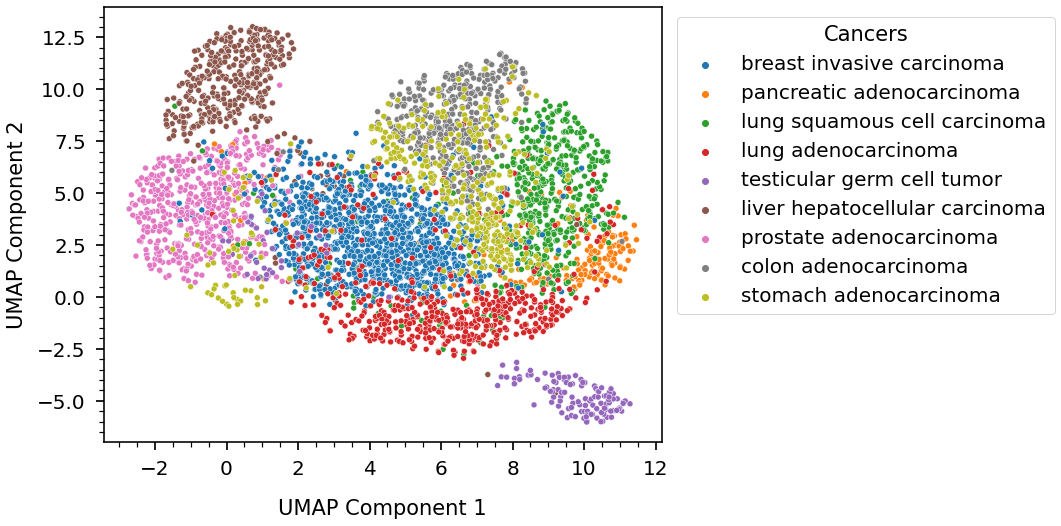

In [50]:
fig, ax = plt.subplots(1,1, figsize=(10, 8))
#WARNING careful the features variable here is different than the feat variable in T-sne subsection
features = tcga_int.loc[tcga_int.index[tcga_int.index.str.contains("ITG")]].T
#print("ALL integrins")
umap_2d = umap.UMAP(n_components=2, init='random', random_state=0,min_dist=0.8)
proj_2d = umap_2d.fit_transform(features)
# fig_2d = px.scatter(
#     proj_2d, x=0, y=1,
#     color=tcga_int.primary,labels={'color': 'primary'},
# )
# fig_2d.show()


sns.scatterplot(x = proj_2d[:,0], y = proj_2d[:,1], hue = tcga_int.T["_primary_disease"].tolist(),hue_order=cancers)
ax.legend(title = 'Cancers', fontsize=20, bbox_to_anchor=(1.01,1)).get_title().set_fontsize(21)
ax.set_ylabel('UMAP Component 2', fontsize=21, labelpad=10)
ax.set_xlabel('UMAP Component 1', fontsize=21, labelpad=20)

ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=20, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='both', which='minor', width = 1.2, size = 5)
# ax.set_ylim([-5,20])


for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
plt.savefig('figures/tcga_pan_UMAP.jpg', dpi = 1000, bbox_inches='tight')

plt.show()


# example 2

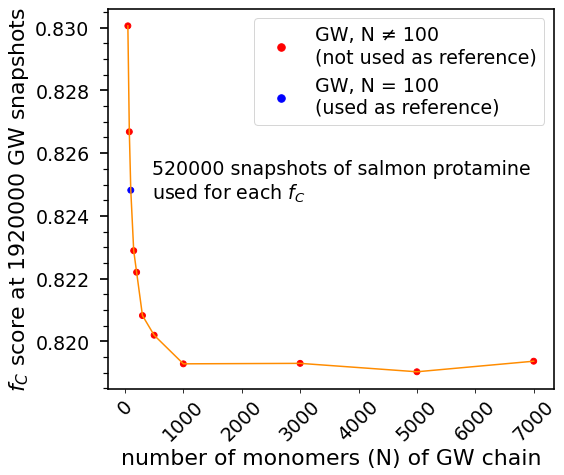

In [53]:
#generating the fC value vs chain length graph again. but without running the entire simulation
#this is the same plot as above (fC value against GW chain length)
#if fC values change in above figure it should change in this one too
fC_values_corr_chainlens = [0.8300578125, 0.82668125, 0.8248182291666667, 0.822890625, 0.822203125,
 0.8208234375,
 0.8201963541666667,
 0.8192838541666667,
 0.8192989583333333,
 0.8190307291666666,
 0.8193677083333334]
list_chainlens = [50, 75, 100, 150, 200, 300,500,1000,3000,5000,7000]
#in this cell, its chain lengths 100, 200, 300 etc. all higher than 100

#plotting variables in previous cell
fig,ax=plt.subplots(figsize=(8,7))

ref_N = 100

categories = np.array([0 if no_mon!= ref_N else 1 for no_mon in list_chainlens])

colors = {0:'red', 1:'blue'}

ax.plot(list_chainlens, fC_values_corr_chainlens,
       color='darkorange')

scatterplt = ax.scatter(list_chainlens,fC_values_corr_chainlens,s=35,
       c = np.vectorize(colors.get)(categories))

custom = [Line2D([], [], marker='.',markersize=15, color='red', linestyle='None'),
          Line2D([], [], marker='.',markersize=15, color='blue', linestyle='None')]

plt.setp(ax.get_xticklabels(),fontsize=19,rotation=45)
plt.setp(ax.get_yticklabels(),fontsize=19)
ax.set_xlabel('number of monomers (N) of GW chain',fontsize=22)
ax.set_ylabel('$f_C$ score at 1920000 GW snapshots',fontsize=22)
#ax.axvline(x=100,ymin=0,ymax=1,linewidth=1.5,color=next(color_list),label='N used as reference')
ax.text(0.1,0.5,'520000 snapshots of salmon protamine\nused for each $f_C$',
                 transform=ax.transAxes,fontsize=19,color='black')

#ax.set_ylim(0.75,0.9)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
    
ax.minorticks_on()
ax.tick_params(axis='y', which='major', labelsize=19, width = 1.7, size = 8,pad=10)
ax.tick_params(axis='y', which='minor', width = 1.2, size = 5)        
ax.tick_params(axis='x', which='minor',bottom=False)        
ax.legend(handles = custom, labels=['GW, N '+'\u2260'+' 100\n(not used as reference)', 'GW, N = 100\n(used as reference)'],
          fontsize = 19)
#ax.get_xaxis().set_major_formatter(
#matplotlib.ticker.FuncFormatter(lambda x, p: format(x/10**6, '0.2f')))
#ax.set_xscale('log')
#ax.set_yscale('log')

plt.savefig('supplemental_algorithm_figures/fC_against_GW_chain_length.png', dpi = 1000, bbox_inches='tight')    



# example 3

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.63 µs


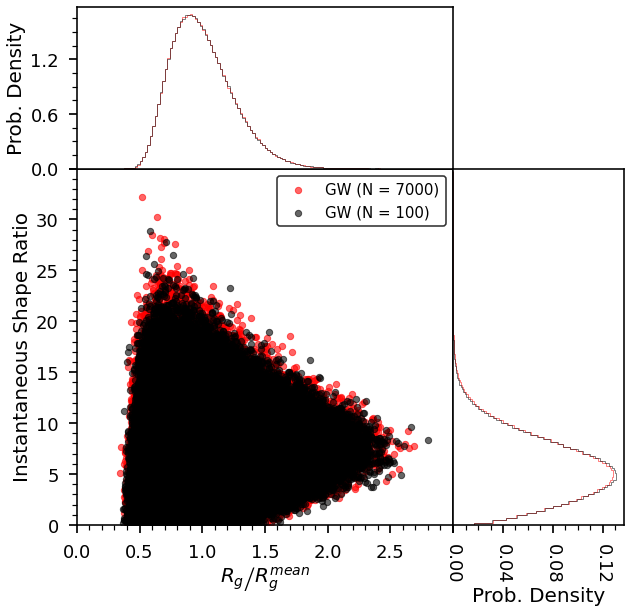

In [76]:
GW_3dplot_2refs()
#this is with 64 runs
plt.savefig('figures/GW_only_2dplot_N_100_7000.png', dpi = 1000, bbox_inches='tight')    

# example 4

CPU times: user 36min 41s, sys: 10.8 s, total: 36min 51s
Wall time: 36min 57s


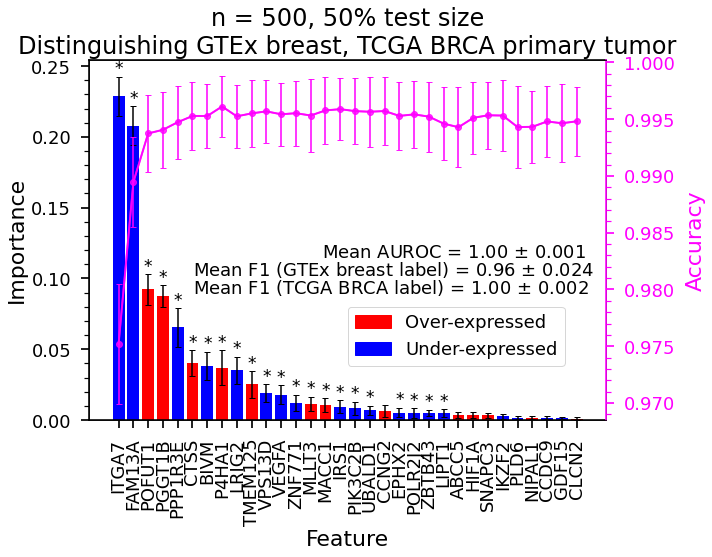

In [153]:
%%time
label_canc='Distinguishing GTEx breast, TCGA BRCA primary tumor'
#class weight balanced here
#DO NOT MAKE mistake on title cancer label. be careful 
fig, ax = plt.subplots(2,1, figsize=(10, 13))
n=500
feature_importance=[]
accuracy=[]
test_size=0.50
auc_roc=[]
f1score_normal=[]
f1score_primtum=[]
y_test_total=[]
y_pred_total=[]
cum_acc_mean=[]
cum_acc_std=[]
cum_acc_itg=[]
feature_importances={"feature": [],"importance": []}
#first calculate the feature importance and accuracy etc.
for iteration in range(n):
    X = combined_donato32[combined_donato32.columns[combined_donato32.columns!='sample_category']]
    y = combined_donato32.sample_category
    #scaler = StandardScaler()
    #X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size) 
    ### Random Forest Classifier ###
    classifier = RandomForestClassifier(n_estimators=100, random_state=42,
                                        class_weight= 'balanced')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    y_test_total=y_test_total+list(y_test)
    y_pred_total=y_pred_total+list(y_pred)
    accuracy.append(accuracy_score(y_test,y_pred))
    f1score_normal.append(f1_score(y_test,y_pred,pos_label = 'normal_breast'))
    f1score_primtum.append(f1_score(y_test,y_pred,pos_label = 'BRCA_primtum'))    
    auc_roc.append(roc_auc_score(y_test,classifier.predict_proba(X_test)[:,1]))
    for i,j in zip(X.columns,classifier.feature_importances_):
        feature_importances['feature'].append(i) 
        feature_importances['importance'].append(j)

        


        
#now plotting
pd.DataFrame(accuracy,columns=['accuracy']).plot(kind='hist',edgecolor='black',ax=ax[0],legend=False)
# ax[0].set_title(f"n= {n}",fontsize=25)
# #ax[0].legend(fontsize=13)
# plt.setp(ax[0].get_xticklabels(),fontsize=12)
# plt.setp(ax[0].get_yticklabels(),fontsize=12)
# ax[0].set_ylabel('Frequency',fontsize=25)
feature_importance_df=pd.DataFrame(feature_importances).set_index('feature')
feature_importance_df = feature_importance_df.sort_values(by='importance')
# for i in ['top', 'left', 'right', 'bottom']:
#     ax[0].spines[i].set_linewidth(1.6)

# ax[0].minorticks_on()
# ax[0].tick_params(axis='both', which='major', labelsize=12, width = 1.7, size = 8,pad=10)
# ax[0].tick_params(axis='both', which='minor', width = 1.2, size = 5)   
# ax[0].set_xlabel('Accuracy',fontsize=25)


#feature_importance_df_mean=feature_importance_df.groupby('feature').mean().sort_values(by='importance',ascending=False)

#feature_importance_df_err=feature_importance_df.groupby('feature').std().loc[feature_importance_df_mean.index]

feature_importance_df_mean=feature_importance_df.groupby('feature').mean().sort_values(by='importance',ascending=False)
feature_importance_df_mean=pd.concat([feature_importance_df_mean,itg_expr_df],axis=1)
feature_importance_df_err=feature_importance_df.groupby('feature').std().loc[feature_importance_df_mean.index]
colors = feature_importance_df_mean.groupby('relative_expression')['bar_color'].apply(lambda x: list(x.unique())[0]).to_dict()

#now calculate cumulatve feature vs accuracy
for cum_gene in range(1,feature_importance_df_mean.shape[0]+1):
    cum_individual_accuracy = []
    for iteration in range(n):
        X = combined_donato32[feature_importance_df_mean.index[0:cum_gene]]
        y = combined_donato32.sample_category
        #scaler = StandardScaler()
        #X_scaled = scaler.fit_transform(X)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size) 
        ### Random Forest Classifier ###
        classifier = RandomForestClassifier(n_estimators=100, random_state=42,
                                            class_weight= 'balanced')
        classifier.fit(X_train,y_train)
        y_pred = classifier.predict(X_test)
        cum_individual_accuracy.append(accuracy_score(y_test,y_pred))
    cum_acc_itg.append(combined_donato32[feature_importance_df_mean.index[cum_gene-1]].name)
    cum_acc_mean.append(np.mean(np.array(cum_individual_accuracy)))
    cum_acc_std.append(np.std(np.array(cum_individual_accuracy)))


#first plot the barplot
bars=ax[1].bar(feature_importance_df_mean.index,
    feature_importance_df_mean['importance'],
                                yerr=feature_importance_df_err['importance'].values,
                                capsize=3,
                                    color=feature_importance_df_mean.bar_color)
for bar,integrin in zip(bars.patches,feature_importance_df_mean.index):
    if feature_importance_df_mean.loc[integrin]['adj_significant_bonf']=='yes':
        ax[1].annotate('*',
                   (bar.get_x() + bar.get_width()/2,
                    bar.get_height()+feature_importance_df_err.loc[integrin]['importance']), ha='center', va='center',
                   size=17, xytext=(0, 8),
                   textcoords='offset points')

ax2 = ax[1].twinx()
#plot the cum accuracy feature
ax2.errorbar(cum_acc_itg, cum_acc_mean,
            yerr=cum_acc_std,capsize=3,color='fuchsia', alpha=0.9, lw=1.7)
ax2.plot(cum_acc_itg, cum_acc_mean, '-o',markersize=6,
         color='fuchsia', lw=2, alpha=0.8)
ax2.set_ylabel('Accuracy', fontsize=22,labelpad=10, color='fuchsia')


ax[1].set_title(f"n = {n}, {int(test_size*100)}% test size\n{label_canc}",fontsize=24)
plt.setp(ax[1].get_xticklabels(),fontsize=18,rotation=90)
plt.setp(ax2.get_yticklabels(),fontsize=18)
ax[1].set_xlabel('Feature',fontsize=22)
ax[1].set_ylabel('Importance',fontsize=22,color='black')
#ax[1].legend(feature_importance_df_mean.relative_expression.unique(),fontsize=17)
handles = [mpatches.Patch(color=colors[i]) for i in colors]
labels = ['Over-expressed' if i=='high' else 'Under-expressed' for i in colors ]
ax[1].legend(handles, labels,fontsize=18,loc=(0.5,0.15))

for i in ['top', 'left', 'bottom']:
    ax[1].spines[i].set_linewidth(1.6)

ax2.spines['right'].set_color('fuchsia')    
ax2.spines['right'].set_linewidth(1.6)    
    
ax[1].minorticks_on()
ax[1].tick_params(axis='both', which='major', labelsize=18, width = 1.7, size = 8,pad=10)
ax[1].tick_params(axis='y', which='minor', width = 1.2, size = 5)    

ax2.minorticks_on()
ax2.tick_params(axis='both', which='major', labelsize=18, width = 1.7, size = 8,pad=10,colors='fuchsia')
ax2.tick_params(axis='y', which='minor', width = 1.2, size = 5,colors='fuchsia')    
ax2.xaxis.set_minor_locator(tck.NullLocator())
# ax[1].text(0.45,
#            0.5,
# f'Mean Accuracy = {format(np.mean(np.array(accuracy)),"0.2f")} $\pm$ {format(np.std(np.array(accuracy)),"0.4f")}',
#            transform=ax[1].transAxes,fontsize=18)
# ax[1].text(0.3,
#            0.52,
# 'With all features combined:',
#            transform=ax[1].transAxes,fontsize=18)
ax[1].text(0.45,
           0.45,
f'Mean AUROC = {format(np.mean(np.array(auc_roc)),"0.2f")} $\pm$ {format(np.std(np.array(auc_roc)),"0.3f")}',
           transform=ax[1].transAxes,fontsize=18)
ax[1].text(0.2,
           0.4,
f'Mean F1 (GTEx breast label) = {format(np.mean(np.array(f1score_normal)),"0.2f")} $\pm$ {format(np.std(np.array(f1score_normal)),"0.3f")}',
           transform=ax[1].transAxes,fontsize=18)
ax[1].text(0.2,
           0.35,
f'Mean F1 (TCGA BRCA label) = {format(np.mean(np.array(f1score_primtum)),"0.2f")} $\pm$ {format(np.std(np.array(f1score_primtum)),"0.3f")}',
           transform=ax[1].transAxes,fontsize=18)

ax[0].remove()
plt.tight_layout()

plt.savefig(f'figures/RF_donato_ITGA7_class-weight_bal.png', dpi = 1000, bbox_inches='tight')
del itg_expr_df, feature_importance, feature_importance_df, feature_importance_df_mean, feature_importance_df_err



# example 5

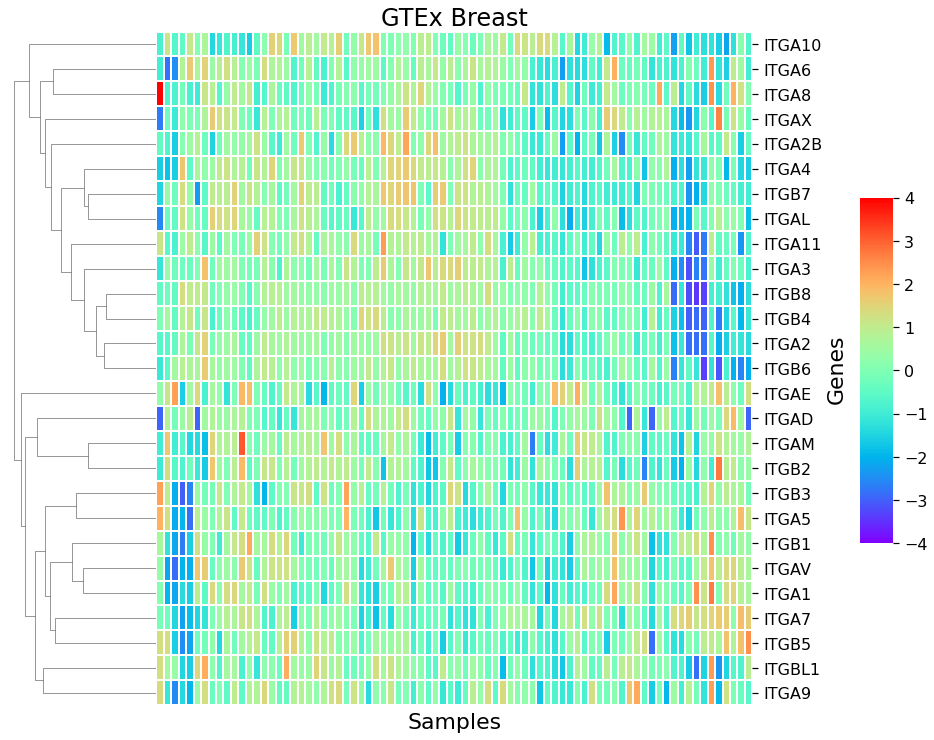

In [17]:
heatmap_df = df_int[df_int.columns[df_int.columns.str.contains('ITG')]].copy()

#convert to Z-score
heatmap_df = (heatmap_df-heatmap_df.mean())/heatmap_df.std()

ax = sns.clustermap(heatmap_df.T, cmap='rainbow', row_cluster=True, col_cluster=True,
                    method='average', metric='cityblock', linewidths=0.01, 
                    fmt='', figsize=(15,12), annot_kws={"size": 20}, vmin=-4,vmax=4, xticklabels=False)


#ax.tick_params(axis='x', labelrotation=90, labelsize=18, size=6, width=1.2, pad=10,visible=False)

ax.tick_params(axis='y', labelrotation=0, labelsize=16, size=6, width=1.2, pad=5)
ax.ax_heatmap.set_title('GTEx Breast',fontsize=24)
ax.ax_heatmap.set_xlabel('Samples', fontsize=22)
ax.ax_heatmap.set_ylabel('Genes', fontsize=22)
# ax.collections[0].set_clim(-2,2)  
# need to fix color bar tickmarks and position

ax.fig.subplots_adjust(right=0.7)
ax.ax_cbar.set_position((0.8, .2, .03, .4))

ax.ax_row_dendrogram.set_visible(True) 
ax.ax_col_dendrogram.set_visible(False) 
#plt.savefig(f'figures/gtex_breast_expr_int_clustermap.png', dpi = 1000, bbox_inches='tight')
del heatmap_df

# example 6

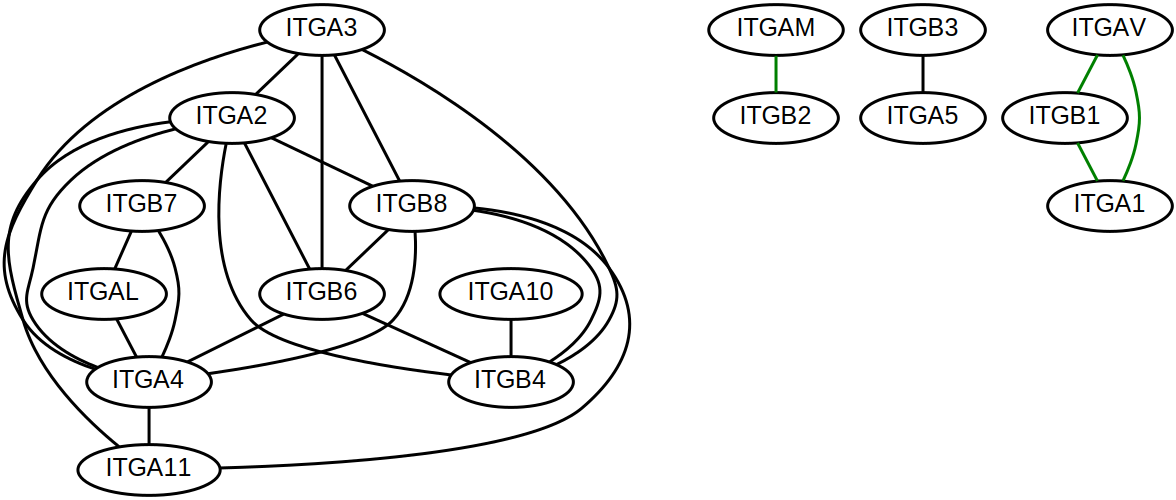

In [49]:
g_gtex = graphviz.Graph(format='png',
                        node_attr={'fontname':'Arial','fontsize':'25','penwidth':'3'},
                       edge_attr={'penwidth':'3'})
for a,b in gtex_pair_list:
    g_gtex.node(a,)
    g_gtex.node(b)
    if [a,b] in tcga_primtum_pair_list or [b,a] in tcga_primtum_pair_list:
        g_gtex.edge(a,b,color='green')
    elif [a,b] not in tcga_primtum_pair_list and [b,a] not in tcga_primtum_pair_list:
        g_gtex.edge(a,b,color='black')

g_gtex.render(filename='gtex_int_int_network',directory='./',view = False, format='png')
g_gtex     


# example 7

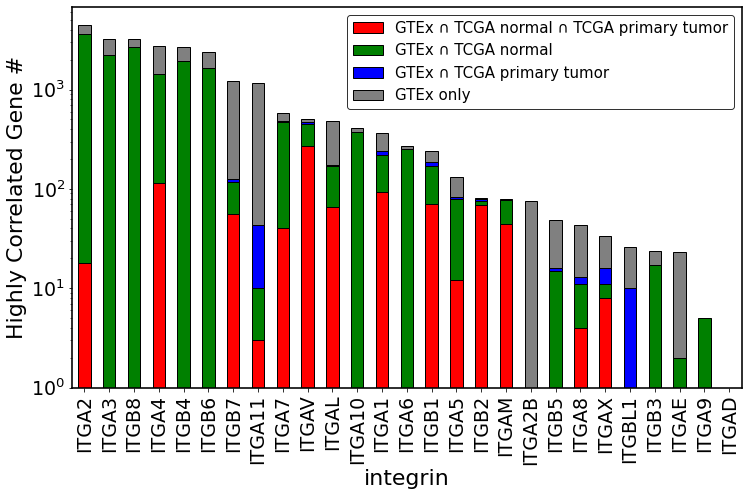

In [111]:
from matplotlib.ticker import ScalarFormatter
gtex_corr_lost_copy = gtex_corr_lost_df.set_index('integrin').copy()

X = 'GTEx \u2229 TCGA normal \u2229 TCGA primary tumor'
A = 'GTEx \u2229 TCGA normal'
B = 'GTEx \u2229 TCGA primary tumor'
D = 'GTEx only'
gtex_venndiagram = pd.DataFrame(gtex_corr_lost_copy['high_corr_all_3']).rename(columns={'high_corr_all_3':X}).copy()
gtex_venndiagram[A] = gtex_corr_lost_copy['also_high_TCGA_normal']-gtex_corr_lost_copy['high_corr_all_3']
gtex_venndiagram[B] = gtex_corr_lost_copy['also_high_TCGA_primtum']-gtex_corr_lost_copy['high_corr_all_3']
gtex_venndiagram[D] = gtex_corr_lost_copy['gtex_highly_correlated']- (gtex_venndiagram[A]+gtex_venndiagram[B]+gtex_venndiagram[X])

gtex_venndiagram['sum'] = gtex_venndiagram.sum(axis=1)
gtex_venndiagram = gtex_venndiagram.sort_values(by='sum',ascending=False)
gtex_venndiagram = gtex_venndiagram.drop(['sum'],axis=1)


fig, ax = plt.subplots(figsize=(12,7))
#now plotting the figure    
colors=["red","green","blue","gray"]
gtex_venndiagram.plot.bar(stacked=True,capsize=4,ax=ax,
                                                color=colors,
                                               linewidth=1,edgecolor='black')

ax.set_ylabel('Highly Correlated Gene #',fontsize=22)
ax.set_xlabel(ax.get_xlabel(),fontsize=22)
# ax.text(0.2,
#            0.95,'ordered by total sum',
#            transform=ax.transAxes,fontsize=15)


#ax.set_xticks(x)


#ax.set_xlim(x.min()-width-margin,x.max()+width+margin)
#ax.set_xticklabels(labels,fontsize=19,rotation=90)

plt.setp(ax.get_yticklabels(),fontsize=19)
plt.setp(ax.get_xticklabels(),fontsize=19)


ax.legend(fontsize=15,edgecolor ='inherit')


for i in ['top', 'left', 'right', 'bottom']:
        ax.spines[i].set_linewidth(1.6)

ax.set_yscale('log')
#plt.gca().yaxis.set_major_formatter(ScalarFormatter())
#fig.tight_layout()


#plt.savefig(f'figures/mean_coefficient_gtex_corr_high_all_integrins.png', dpi = 1000, bbox_inches='tight')






# example 8

uniq columns df shape is: (27, 7), should be 7 columns
always double-check if numbers are in right places in Venn diagram!!


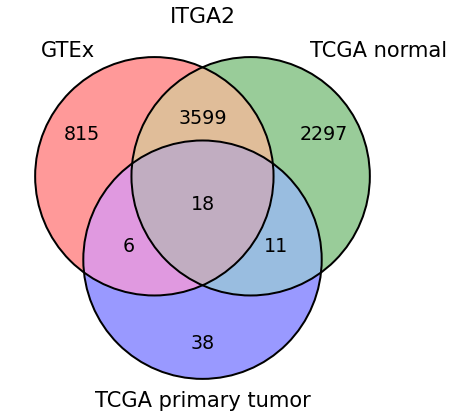

In [178]:
combined_venn_diagram_uniqcol = combined_venn_diagram.loc[:,~combined_venn_diagram.columns.duplicated()].copy()
print(f'uniq columns df shape is: {combined_venn_diagram_uniqcol.shape}, should be 7 columns')
print('always double-check if numbers are in right places in Venn diagram!!')
chosen_integ='ITGA2'
#create a map for subset region labels
map_subsets=dict()
map_subsets[X] = str(111)
map_subsets[A] = str(110)
map_subsets[B] = str(101)
map_subsets[D] = str(100)
map_subsets[E] = '011'
map_subsets[G] = '001'
map_subsets[F] = '010'

#plot venn diagram
fig,ax = plt.subplots(figsize=(7,7))
v = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('GTEx',
                                                       'TCGA normal', 'TCGA primary tumor'),
          set_colors=('red','green','blue'),
         ax=ax)
c = venn3_circles(subsets=(1, 1, 1, 1, 1, 1, 1), linestyle='solid',ax=ax)

ax.set_title(chosen_integ,fontsize=22)

#plot the values
for key, value in map_subsets.items():
    v.get_label_by_id(value).set_text(combined_venn_diagram_uniqcol.loc[chosen_integ][key])



for text in v.set_labels:
    text.set_fontsize(21)
for text in v.subset_labels:
    text.set_fontsize(19)

del combined_venn_diagram_uniqcol
#some junk commands below for storage
# plt.annotate('Unknown set', xy=v.get_label_by_id('100').get_position() - np.array([0, 0.05]), xytext=(-70,-70),
#              ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
#              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5',color='gray'))
#v.get_patch_by_id('100').set_alpha(1.0)
# v.get_patch_by_id('100').set_color('yellow')
# v.get_patch_by_id('010').set_color('green')
# v.get_patch_by_id('001').set_color('blue')
#c[0].set_lw(1.0) c is the venn3_circles command
#c[0].set_ls('solid')


# example 9

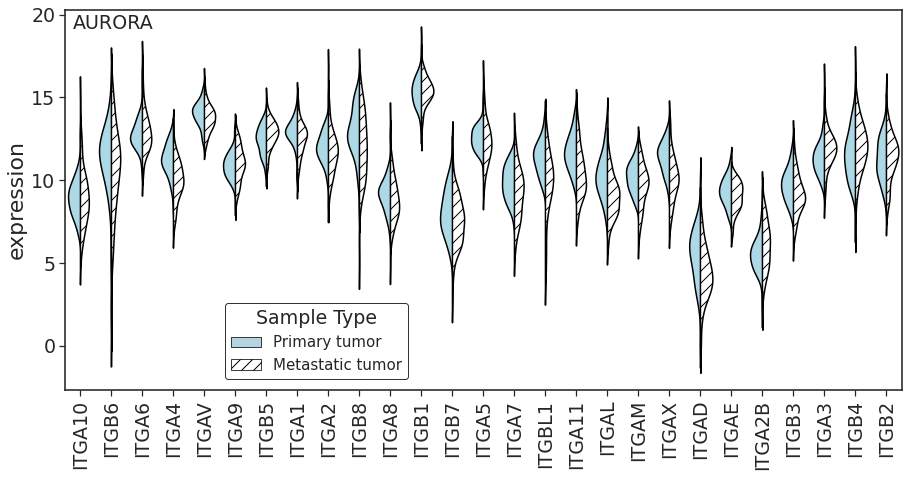

In [180]:
fig, ax = plt.subplots(figsize=(15,7))

sns.set(style="ticks", color_codes=True)
sns.violinplot(data=itg_vp_df,
                          x="integrin",y="expression",hue='sample_cat',ax=ax,split=True,inner=None,
                         palette=sns.color_palette(palette=['lightblue','white']))

for i, violin in enumerate(ax.findobj(mpl.collections.PolyCollection)):
    if i % 2:
        violin.set_hatch("//")
        violin.set_facecolor("white")
        violin.set_edgecolor("black")
        violin.set_alpha(1)
    else:
        violin.set_facecolor("lightblue")
        violin.set_edgecolor("black")
        violin.set_alpha(1)
        
ax.text(0.01,0.95,'AURORA',
               transform=ax.transAxes,fontsize=19)
ax.legend( fontsize=15,title='Sample Type',loc='lower center',bbox_to_anchor=(0.3,0.01),
                title_fontsize=19, edgecolor='black')

#format legends
ax.legend_.findobj(mpl.patches.Rectangle)[0].set_edgecolor("black")
ax.legend_.findobj(mpl.patches.Rectangle)[0].set_alpha(1)


ax.legend_.findobj(mpl.patches.Rectangle)[1].set_hatch("//")  
ax.legend_.findobj(mpl.patches.Rectangle)[1].set_edgecolor("black")
ax.legend_.findobj(mpl.patches.Rectangle)[1].set_alpha(1)

plt.setp(ax.get_xticklabels(),fontsize=19,rotation=90)
ax.tick_params(axis='y', labelsize=19)      

ax.set_ylabel('expression',fontsize=22)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
x_axis = ax.axes.get_xaxis()        
x_label = x_axis.get_label()
##print isinstance(x_label, matplotlib.artist.Artist)
x_label.set_visible(False)

plt.savefig(f'AURORA_figures/vp_primary_metastatic_sample_mean_integrin_expression.png',
            dpi = 1000, bbox_inches='tight')


# example 10

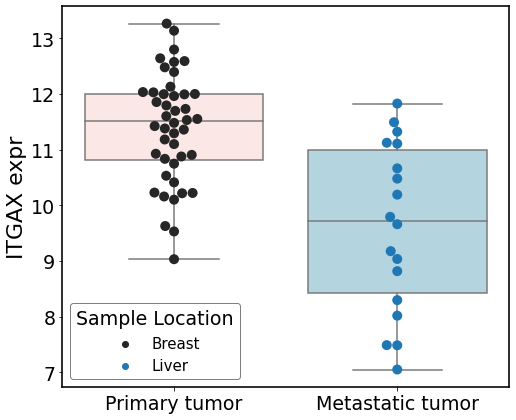

In [45]:
fig,ax=plt.subplots(figsize=(8,7))

gene_chosen='ITGAX'

sns.boxplot(data=temp_aur_bcm_df.T,y=gene_chosen,
               x='sample_cat',palette=['mistyrose','lightblue'],
                      ax=ax,showfliers=False,order = ['Primary tumor', 'Metastatic tumor'])

sns.swarmplot(data=temp_aur_bcm_df.T[temp_aur_bcm_df.T['sample_cat']=='Primary tumor'],y=gene_chosen,
               x='sample_cat',hue='sample_loc',palette='dark:black',
                      ax=ax,size=10)


sns.swarmplot(data=temp_aur_bcm_df.T[temp_aur_bcm_df.T['sample_cat']=='Metastatic tumor'],y=gene_chosen,
               x='sample_cat',hue='sample_loc',palette='tab20',
                      ax=ax,size=10,marker='o')

legend=ax.legend(fontsize=15,title='Sample Location',
                title_fontsize=19,edgecolor='inherit',loc='lower left')
legend.get_frame().set_alpha(0.5)
plt.setp(ax.get_xticklabels(),fontsize=19)
ax.tick_params(axis='y', labelsize=19)      

ax.set_ylabel(gene_chosen+' expr',fontsize=22)
for i in ['top', 'left', 'right', 'bottom']:
    ax.spines[i].set_linewidth(1.6)
x_axis = ax.axes.get_xaxis()        
x_label = x_axis.get_label()
##print isinstance(x_label, matplotlib.artist.Artist)
x_label.set_visible(False)
#ax.set_yscale('log')    
